## How many rows and columns are in the dataset?

In [41]:
import pandas as pd

# Load the dataset
df_0 = pd.read_csv('data/cleaned/appended_data.csv')

# Question 1: How many rows and columns are in the dataset?
print("Number of observations (rows):", df_0.shape[0])
print("Number of features (columns):", df_0.shape[1])


Number of observations (rows): 11076
Number of features (columns): 45


## What is the proportion of missing values per column?

In [43]:
# Question 2: What is the proportion of missing values per column?
#print("Proportion of missing values per column:\n", df.isnull().mean())

# The proportion of missing values per column in descending order
#print("Proportion of missing values per column (desc):\n",df.isnull().mean().sort_values(ascending=False))

# How many columns have a proportion of missing values over 60%?
print("Number of columns with a proportion of missing values over 60%:", (df_0.isnull().mean() > 0.6).sum())

# Display column names with proportion of missing values over 50% and the proportion of missing values in descending order
print("Columns with proportion of missing values over 60% and their proportion of missing values (desc):\n", df_0.isnull().mean()[df_0.isnull().mean() > 0.6].sort_values(ascending=False))


Number of columns with a proportion of missing values over 60%: 11
Columns with proportion of missing values over 60% and their proportion of missing values (desc):
 Parking box count        1.000000
Sea view                 0.998917
Is Holiday Property      0.986367
Terrace Orientation      0.976074
Garden Orientation       0.917570
Sewer                    0.855092
Gas Water Electricity    0.800108
Kitchen Surface          0.740610
Parking count inside     0.685175
Land Surface             0.680029
Parking count outside    0.672896
dtype: float64


## Identify & remove (drop) all columns with more than 60% missing values from our data set

In [71]:
# Identify columns with more than 60% missing values
columns_to_drop = df_0.columns[df_0.isnull().mean() > 0.6]

# Drop columns with over 60% missing values from the DataFrame and create a copy of the DataFrame with the remaining columns
df_1 = df_0.drop(columns=columns_to_drop).copy()

# Save the cleaned DataFrame to a new CSV file
df_1.to_csv('data/cleaned/cleaned_missing_vals.csv', index=False)

# Optionally, print out the shape of the new DataFrame to confirm the changes
print("Shape of DataFrame after removing columns with >60% missing values:", df_1.shape)


Shape of DataFrame after removing columns with >60% missing values: (11076, 34)


## Are therey any duplicates?

In [46]:
# Check for duplicates
print(df_1.duplicated().sum())

# Display the column names and their data types
# print(df.dtypes)

# Display the first few rows of the dataframe
# print(df.head())

0


## Price distribution per region for all properties in our dataset

### Import all necessary plotting libraries 

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Price distribution per region
### Plot type: boxplot

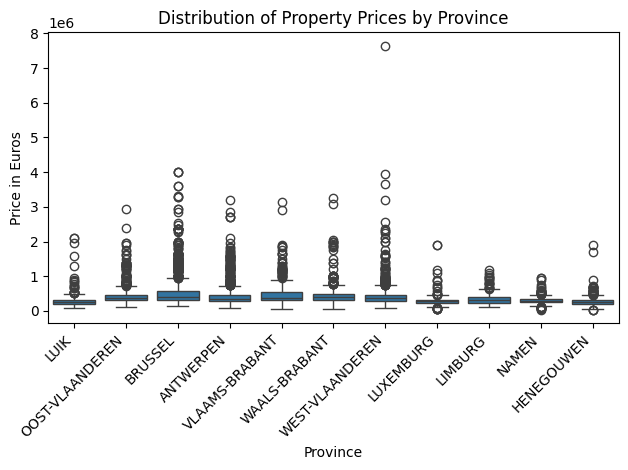

In [47]:

# Ensure that 'Price' is in numeric format
df_1['Price'] = pd.to_numeric(df_1['Price'], errors='coerce')

# Create a box plot
sns.boxplot(x='Province', y='Price', data=df_1)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Euros')
plt.title('Distribution of Property Prices by Province')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Price distribution per region
### Plot type: violin plot

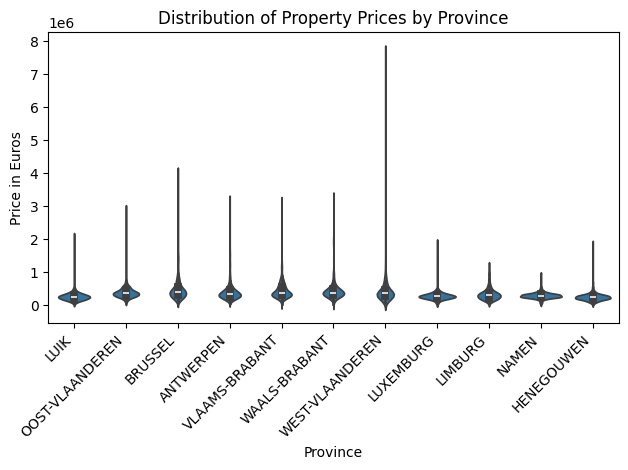

In [48]:
# Create a violin plot
sns.violinplot(x='Province', y='Price', data=df_1)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Euros')
plt.title('Distribution of Property Prices by Province')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

### Thoughts:
- there are many prices in our data set that are way out of the interquartile range. 
- there are too many provinces, we only want the main 3
- the scientific notation for the price is not very helpful
### Suggested actions:
- sub-set the data set to only include properties with a price of less than 1,000,000
- merge the provinces into the main 3


## Format the X-axis label from scientific notation to million EUR units

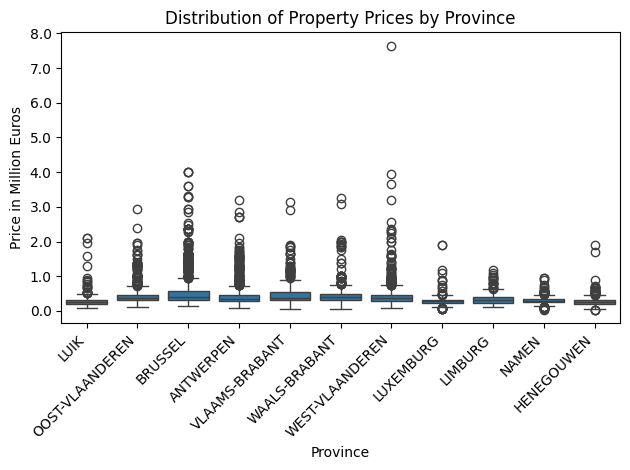

In [49]:
# Ensure that 'Price' is in numeric format
df_1['Price'] = pd.to_numeric(df_1['Price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='Province', y='Price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## There is one outlier data point in the price column. Identify and remove it

In [72]:
# Ensure that 'Price' is in numeric format
df_1['Price'] = pd.to_numeric(df_1['Price'], errors='coerce')

# BAD WAY of creating a new df apparently, kept hitting a warning message:
# df_2 = df_1[df_1['Price'] < 7000000]

#This is the GOOD WAY to create a new df with a subset of the original df, by using the .copy() method
df_2 = df_1[df_1['Price'] <= 7000000].copy()

# Print the number of rows and columns in the new DataFrame
print("Number of observations (rows) with villa:", df_1.shape[0])
print("Number of observations (rows) without villa:", df_2.shape[0])
print("Number of columns in newest df:", df_2.shape[1])


Number of observations (rows) with villa: 11076
Number of observations (rows) without villa: 11075
Number of columns in newest df: 34


## The outlier is a holiday villa at the seaside.
#### We will remove it from further analysis since it is a unique property and not representative of our small dataset.

## Re-plot the price distribution per region for all properties in our dataset, without the outlier villa

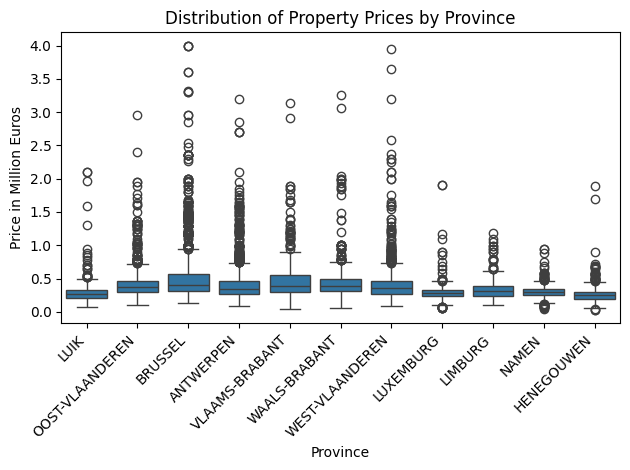

In [73]:
# Create a box plot (or violin plot, commented)
sns.boxplot(x='Province', y='Price', data=df_2)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Create a new feature: REGION
### The function takes the values in the existing Province column and groups them to create a new column REGION that only has the three main regions in Belgium: Flanders, Wallonia and Brussels

In [74]:
# Function to determine the region based on the province
def province_to_region(province):
    if province in ['LUIK', 'LIMBURG', 'WAALS-BRABANT', 'LUXEMBURG', 'NAMEN', 'HENEGOUWEN']:
        return 'Wallonia'
    elif province == 'BRUSSEL':
        return 'Brussels'
    elif province in ['OOST-VLAANDEREN', 'ANTWERPEN', 'VLAAMS-BRABANT', 'WEST-VLAANDEREN']:
        return 'Flanders'
    else:
        return 'Unknown'  # For any province value not listed above

# Apply the function to the 'Province' column to create the new 'Region' column
df_2['Region'] = df_2['Province'].apply(province_to_region)

## Verify that the new column is correctly created

In [76]:
print(df_2['Region'].unique()) # Display unique values in the 'Region' column
print(df_2['Region'].value_counts()) # Display the count of each unique value in the 'Region' column
print(df_2.sample(3)) # Display a random sample of 5 rows from the DataFrame

['Wallonia' 'Flanders' 'Brussels']
Region
Flanders    5617
Wallonia    3340
Brussels    2118
Name: count, dtype: int64
            ID   Locality  Postal Code  Build Year  Facades  \
4823  11101677      Wavre         1300         NaN      NaN   
6534  11156814  CARNIERES         7141      1997.0      4.0   
3221  10630838    Seneffe         7180         NaN      NaN   

      Habitable Surface       Type    Subtype   Price    Sale Type  ...  \
4823              197.0  APARTMENT       LOFT  283851  NORMAL_SALE  ...   
6534              150.0      HOUSE      HOUSE  349000  NORMAL_SALE  ...   
3221               86.0  APARTMENT  APARTMENT  290000  NORMAL_SALE  ...   

      Living Surface  EPC  Consumption Per m2  Cadastral Income  \
4823             NaN    B                89.0                 0   
6534            37.0    D               329.0               994   
3221             NaN    A                 NaN                 0   

      Has starting Price Transaction Subtype  Heating Type

## Check for unknown values in the new column 
### P.S. There was an initial error that returned unknowns, now fixed.

In [78]:
unknown_regions = df_2[df_2['Region'] == 'Unknown']
print(f"Number of 'Unknown' regions: {len(unknown_regions)}")
if not unknown_regions.empty:
    print("Sample of 'Unknown' regions:")
    print(unknown_regions.sample(min(5, len(unknown_regions))))  # Show up to 5 samples

Number of 'Unknown' regions: 0


## Distribution of prices per main region in Belgium

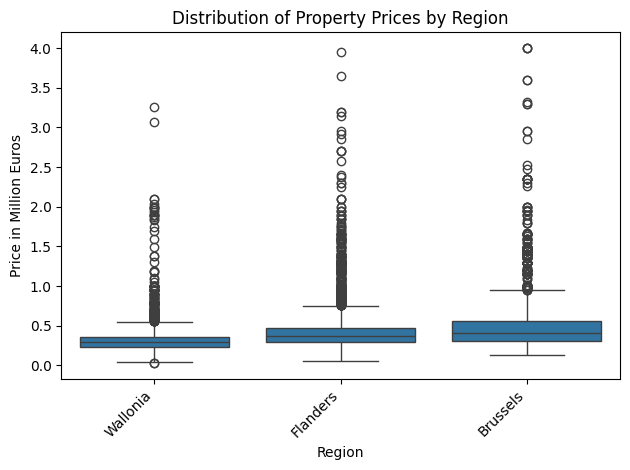

In [79]:
# Create a box plot
sns.boxplot(x='Region', y='Price', data=df_2)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Region')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Region')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Subset our data set into two groups: apartments and houses

### First check how many unique values there are in the type column

In [80]:
# Display all unique values in the 'Type' column
unique_types = df_2['Type'].unique()
print("Unique values in 'Type' column:", unique_types)

# Get the count of unique values in the 'Type' column
unique_type_count = df_2['Type'].nunique()
print("Number of unique values in 'Type' column:", unique_type_count)


Unique values in 'Type' column: ['APARTMENT' 'HOUSE' 'OFFICE' 'COMMERCIAL' 'LAND' 'GARAGE']
Number of unique values in 'Type' column: 6


### Now remove all rows that are of type different than apartment or house

In [90]:
print(df_2['Type'].unique()) # Display unique values in the 'Type' column
print(df_2['Type'].value_counts()) # Display the count of each unique value in the 'Type' column

# Make a copy of the df where we only keep rows where 'Type' is 'HOUSE' or 'APARTMENT'
df_3 = df_2[df_2['Type'].isin(['HOUSE', 'APARTMENT'])].copy()
print(df_3['Type'].unique()) # Display unique values in the 'Type' column

count = len(df_2[df_2['Type'].isin(['HOUSE', 'APARTMENT'])])
print(f"Total number of rows with 'HOUSE' or 'APARTMENT' in the 'Type' column: {count}")

print(df_3['Type'].unique()) # Display unique values in the 'Type' column
print(df_3['Type'].value_counts())


import os

# Create the directory if it does not exist
os.makedirs('data/cleaned', exist_ok=True)

# Now save the new DataFrame to a csv that only contains observations for houses and apartments
df_3.to_csv('data/cleaned/cleaned_extratypes.csv', index=False)


['APARTMENT' 'HOUSE' 'OFFICE' 'COMMERCIAL' 'LAND' 'GARAGE']
Type
APARTMENT     7531
HOUSE         3442
LAND            53
COMMERCIAL      31
OFFICE          17
GARAGE           1
Name: count, dtype: int64
['APARTMENT' 'HOUSE']
Total number of rows with 'HOUSE' or 'APARTMENT' in the 'Type' column: 10973
['APARTMENT' 'HOUSE']
Type
APARTMENT    7531
HOUSE        3442
Name: count, dtype: int64


## Create two separate data frames, one for houses, one for apartments

In [91]:
# Create a DataFrame for houses
df_houses = df_3[df_3['Type'] == 'HOUSE'].copy()

# Create a DataFrame for apartments
df_apartments = df_3[df_3['Type'] == 'APARTMENT'].copy()

## Distribution of prices per main region in Belgium, for houses and apartments

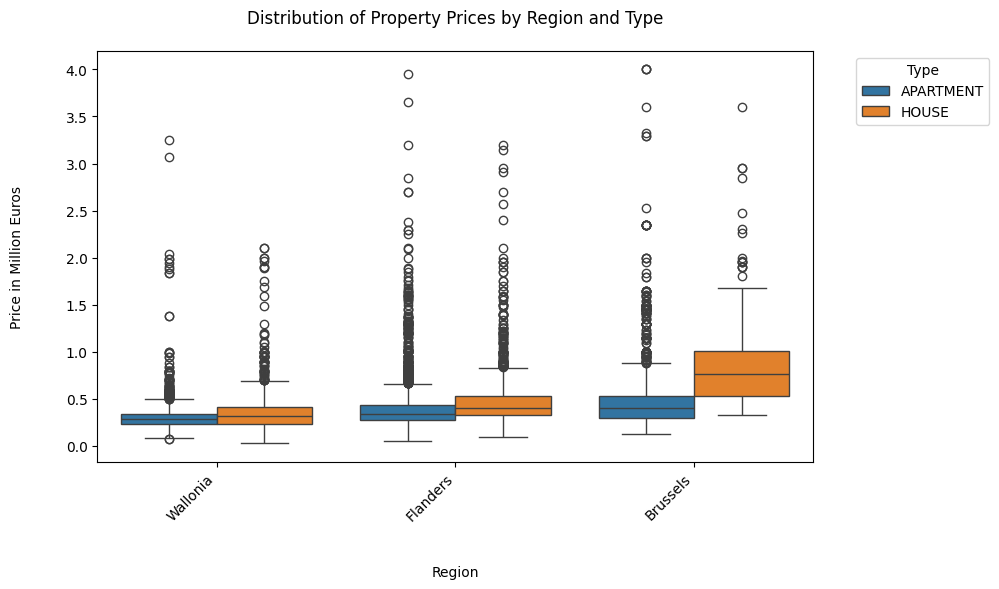

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the figure size to make the plot wider
plt.figure(figsize=(12, 6))  # Increase the width as needed

# Ensure that 'Price' is in numeric format
df_3['Price'] = pd.to_numeric(df_3['Price'], errors='coerce')

# Create a box plot with 'Region' on the x-axis, 'Price' on the y-axis, and 'Type' as the hue
sns.boxplot(x='Region', y='Price', hue='Type', data=df_3)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')


# Set the labels and title
plt.xlabel('Region', labelpad=20)
plt.ylabel('Price in Million Euros', labelpad=20)
plt.title('Distribution of Property Prices by Region and Type', pad=20)

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Move the legend outside the plot
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with adjusted layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter as needed to fit your plot and legend
plt.show()